### Проект. Улучшение baseline-модели

**Описание задачи**    
Яндекс Недвижимости - маркетплейсе для аренды и покупки недвижимости. Стоит задача — выступить надёжным посредником между арендодателями или продавцами и потенциальными арендаторами или покупателями, сделав процесс сделки максимально эффективным и безопасным для обеих сторон.

**Проблема**    
Согласно выдвинутой гипотезе, стоимость объекта недвижимости можно объективно оценить извне — это устранит разногласия между сторонами и увеличит среднемесячное количество сделок на платформе. Было разработано базовое решение в виде модели машинного обучения и организован пайплайн данных в Airflow. По оценкам менеджеров, базовая модель потенциально прибыльна, однако метрики модели можно улучшить. 

**Бизнес-задача**    
Стоит задача оптимизировать подход, основываясь на первоначально построенном решении и настроенном пайплайне данных. Цель — сделать процесс воспроизводимым и улучшить ключевые модельные метрики, которые влияют на бизнес-показатели компании, в частности, на увеличение количества успешных сделок. Для проведения большого числа экспериментов и обеспечения их воспроизводимости необходима интеграция в MLflow.

**Задача машинного обучения**    
Процесс прогнозирования стоимости требует доработки, для чего необходимо использовать методы конструирования и отбора признаков, а также применять алгоритмы для поиска оптимальных гиперпараметров модели.
Необходимо улучшить основную метрику проекта, которая влияет на точность предсказаний стоимости недвижимости и, как следствие, на количество успешных сделок на маркетплейсе.    
Необходимо также документировать все эксперименты в MLflow - это позволит отслеживать изменения в метриках и вносимые улучшения. Все успешные версии моделей должны быть зарегистрированы в соответствующем реестре MLflow для отслеживания, сравнения и дальнейшего использования. 

**Данные**    
Данные были подготовлены и предобработаны с помощью пайплайна в Airflow на предыдущем проекте.

**План проекта**    
- Этап 1. Разворачивание MLflow Tracking Server и MLflow Model Registry. Регистрация существующей модели
    - Установка и запуск Tracking Server и Model Registry, настройка окружения
    - Запуск MLflow-сервер с указанием PostgreSQL в качестве backend-store-uri и S3 в качестве default-artifact-root
    - Регистрация обученной модели с указанием сигнатуры, данных, параметров и метрик, а также их логирование
    - Результаты этапа:
        - Код для запуска MLflow-сервисов, код для регистрации модели, залогированные параметры, метрики, окружение и артефакты, сохранённые в репозитории GitHub
        - Сохранённая в MLflow Model Registry базовая модель
        - Инструкция по поднятию MLflow-сервисов и регистрации модели в MLflow Tracking Server
- Этап 2. Проведение исследовательского анализа данных и логирование Jupyter Notebook с EDA в MLflow
    - Загрузить данные в Jupyter Notebook
    - Визуализация данных при помощи библиотек Matplotlib и Seaborn
    - Анализ взаимодействия признаков и целевой переменной
    - Оформление выводов, полученных в ходе EDA в формате Markdown
    - Логирование Jupyter Notebook и Markdown-файл с выводами
    - Результаты этапа:
        - Код, графики и комментарии в Jupyter Notebook
        - Выводы EDA в формате Markdown в Jupyter Notebook
        - Залогированные в MLflow Jupyter Notebook и Markdown-файл с выводами как артефакты

- Этап 3. Генерация признаков и обучение модели
    - Предобработка данных: нормализация, масштабирование, кодирования признаков
    - Генерация признаков методами PolynomialFeatures, KBinsDiscretizer, собранных в объект ColumnTransformer
    - Создание пайплайна в sklearn
    - Настройка автоматической генерации признаков с помощью библиотеки autofeat
    - Обучение новой версии модели на обогащённом наборе признаков, оценка её качества и производительности
    - Логирование результатов в MLflow, сохранение новой версии модели в MLflow Model Registry
    - Результаты этапа:
        - Код к текущему этапу с комментариями, оформленный и сохранённый на GitHub
        - Оформленный раздел в Jupyter Notebook с примерами использования autofeat для автоматической генерации признаков
        - Залогированные в MLflow: Pipeline, код для генерации признаков, окружение, сигнатура модели и сама обученная модель
        - Новая версия модели в MLflow Model Registry
- Этап 4. Отбор признаков и обучение новой версии модели
    - Применение методов отбора признаков из библиотеки mlxtend
    - Обучение новой версии модели на основе отобранных признаков, оценка ее метрик на тестовой выборке
    - Логирование процесса отбора признаков, окружения, обученную модели, её параметры, метрики качества и другие артефакты
    - Сохранение новой версии модели в MLflow Model Registry
    - Результаты этапа:
        - Код для отбора признаков и обучения модели в Jupyter Notebook с комментариями к каждому шагу
        - Залогированные артефакты в MLflow
        - Новая версия модели в MLflow Model Registry
- Этап 5. Подбор гиперпараметров и обучение новой версии модели
    - Подбор гиперпараметров с помощью optuna, логирование процесса их оптимизации, их значений и метрик качества с помощью MLflow Callback
    - Применение другого метода оптимизации с логированием процесса и результатов
    - Обучение новой версии модели с отобранными признаками и лучшими гиперпараметрами, оценка её производительности на тестовой выборке,  сравнение с предыдущими версиями моделей
    - Логирование финальной модели, её метрик и дополнительных артефактов, регистрация новой версии модели в MLflow Model Registry с указанием применённых методов оптимизации гиперпараметров и достигнутыми улучшениями.
    - Результаты этапа:
        - Код для подбора гиперпараметров и обучения модели в Jupyter Notebook с комментариями
        - Наличие всех запусков в MLFlow, включая процесс подбора гиперпараметров, эксперименты с разными методами и их результаты, окружение, а также финальные метрики новой версии модели
        - Финальная версия модели в MLflow Model Registry


Этап 1. Разворачивание MLflow Tracking Server и MLflow Model Registry. Регистрация существующей модели    
    
Результаты:    
- инициализированы:    
        - MLflow-сервер    
        - эксперимент `Спринт 3/9: 2 спринт → Тема 5/5: Проект`    
        - запуск `ETL`
        - залогированы в MLFlow модель `model_sprint_2`, метрики, параметры, артефакты (`Artifacts/models`)    
        - датасет базе данных PostgreSQL `clean_flats`

In [29]:
# Импорты библиотек и инициализация параметров

import sys
import os
import numpy as np
import random
import pandas as pd
import psycopg
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sqlalchemy import create_engine

TABLE_NAME = 'clean_flats'
RANDOM_STATE = 42

pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (20, 8)

import statistics
from scipy.stats import skew
import phik
from scipy.stats import boxcox

In [2]:
def get_engine():
    return create_engine(f"postgresql://{os.getenv('DB_DESTINATION_USER')}:"
                        f"{os.getenv('DB_DESTINATION_PASSWORD')}@"
                        f"{os.getenv('DB_DESTINATION_HOST')}:"
                        f"{os.getenv('DB_DESTINATION_PORT')}/"
                        f"{os.getenv('DB_DESTINATION_NAME')}"
                        )

def load_df(table_name):
    return pd.read_sql(sql=f'SELECT * FROM {table_name}', con=get_engine())

def save_df(df, table_name):
    return df.to_sql(name=table_name, con=get_engine(), index=True, if_exists='replace')

In [3]:
def display_statistics(data):

    def lo_hi_count(data, col, low=True):
        if data[col].dtype not in [float, int,'datetime64[ns]']:
            return '---'
        Q1 = np.nanquantile(data[col], 0.25)
        Q3 = np.nanquantile(data[col], 0.75)
        if low:
            return data[data[col] <= (Q1 - 1.5 * (Q3 - Q1))][col].count()
        else:
            return data[data[col] >= (Q3 + 1.5 * (Q3 - Q1))][col].count()

    return pd.DataFrame(
        {'type': [data[x].dtypes for x in data.columns],
         'count' : [data[x].count() for x in data.columns],
         'NaNs' : [data[x].isna().sum() for x in data.columns],
         'zero_values': [data[x].eq(0).sum() for x in data.columns],
         'unique_values': [data[x].nunique() for x in data.columns],
         'top_3_freq': [data[x].value_counts().head(3).to_dict() for x in data.columns],
         'min': [data[x].min() if data[x].dtype!=object else '---' for x in data.columns],
         'mean': [data[x].mean() if data[x].dtype!=object else '---' for x in data.columns],
         'max': [data[x].max() if data[x].dtype!=object else '---' for x in data.columns],
         'std': [data[x].std() if data[x].dtype!=object else '---' for x in data.columns],
         'lo_count': [lo_hi_count(data, x) for x in data.columns],
         'hi_count': [lo_hi_count(data, x, low=False) for x in data.columns],
        }, index = [x for x in data.columns])

In [4]:
df = load_df(TABLE_NAME).drop(['id', 'flat_id'], axis=1)
display_statistics(df)
df.duplicated().sum()

0

In [5]:

random.shuffle(s := list(df.index))
s = [s[i::10] for i in range(10)]
tdf = pd.DataFrame(columns=df.columns)

for i in range(10):
    tdf.loc[f'Fold_{i}'] = list(df.iloc[s[i]].std()/df.iloc[s[i]].mean())

tdf.loc['Entire_df'] = list(df.std()/df.mean())
tdf

,floor,is_apartment,kitchen_area,living_area,rooms,total_area,price,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator
Fold_0,0.75,10.66,0.50,0.58,0.44,0.54,1.27,0.49,0.01,0.45,0.00,0.00,0.07,0.80,0.47,0.33
Fold_1,0.74,10.81,0.52,0.58,0.44,0.54,1.32,0.50,0.01,0.45,0.00,0.00,0.07,0.83,0.47,0.34
Fold_2,0.76,11.01,0.50,0.58,0.45,0.53,1.30,0.50,0.01,0.44,0.00,0.00,0.07,0.82,0.48,0.34
Fold_3,0.74,9.94,0.51,0.57,0.44,0.53,1.26,0.50,0.01,0.45,0.00,0.00,0.07,0.80,0.47,0.34
Fold_4,0.76,10.66,0.51,0.58,0.45,0.55,1.33,0.49,0.01,0.45,0.00,0.00,0.07,0.83,0.48,0.34
Fold_5,0.75,10.81,0.52,0.59,0.45,0.55,1.30,0.50,0.01,0.45,0.00,0.00,0.07,0.82,0.48,0.34
Fold_6,0.74,9.48,0.51,0.58,0.45,0.54,1.26,0.49,0.01,0.45,0.00,0.00,0.07,0.81,0.48,0.33
Fold_7,0.75,10.26,0.52,0.57,0.44,0.53,1.28,0.50,0.01,0.45,0.00,0.00,0.07,0.82,0.48,0.34
Fold_8,0.75,9.79,0.50,0.56,0.44,0.53,1.25,0.50,0.01,0.45,0.00,0.00,0.07,0.83,0.48,0.34
Fold_9,0.74,10.43,0.52,0.59,0.44,0.55,1.33,0.50,0.01,0.45,0.00,0.00,0.07,0.83,0.48,0.34


In [6]:
random.shuffle(s := list(df.index))
s = [s[i::10] for i in range(10)]
tdf = pd.DataFrame(columns=df.columns)

for i in range(10):
    tdf.loc[f'Fold_{i}'] = list(df.iloc[s[i]].std()/df.iloc[s[i]].mean())

tdf.loc['Entire_df'] = list(df.std()/df.mean())
tdf

,floor,is_apartment,kitchen_area,living_area,rooms,total_area,price,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator
Fold_0,0.75,10.18,0.51,0.57,0.45,0.53,1.30,0.49,0.01,0.45,0.00,0.00,0.07,0.80,0.48,0.34
Fold_1,0.74,11.01,0.51,0.57,0.44,0.54,1.27,0.50,0.01,0.45,0.00,0.00,0.07,0.83,0.48,0.34
Fold_2,0.74,9.83,0.51,0.58,0.45,0.54,1.33,0.50,0.01,0.45,0.00,0.00,0.07,0.83,0.47,0.34
Fold_3,0.74,10.02,0.51,0.56,0.44,0.52,1.22,0.50,0.01,0.45,0.00,0.00,0.07,0.82,0.47,0.34
Fold_4,0.74,10.52,0.52,0.58,0.44,0.54,1.37,0.50,0.01,0.45,0.00,0.00,0.07,0.81,0.47,0.34
Fold_5,0.76,9.98,0.50,0.58,0.45,0.54,1.25,0.50,0.01,0.45,0.00,0.00,0.07,0.84,0.49,0.34
Fold_6,0.75,9.90,0.51,0.57,0.44,0.53,1.25,0.49,0.01,0.45,0.00,0.00,0.07,0.82,0.48,0.33
Fold_7,0.74,11.75,0.52,0.58,0.45,0.54,1.29,0.49,0.01,0.45,0.00,0.00,0.07,0.80,0.47,0.33
Fold_8,0.76,10.62,0.50,0.59,0.45,0.54,1.31,0.50,0.01,0.45,0.00,0.00,0.07,0.81,0.47,0.34
Fold_9,0.75,10.14,0.51,0.59,0.45,0.55,1.32,0.50,0.01,0.44,0.00,0.00,0.07,0.83,0.48,0.35


In [7]:
target = ['price']
cat_columns = [x for x in df.columns if df[x].nunique() < 10]
num_columns = [x for x in df.columns if x not in cat_columns and x !=target[0]]

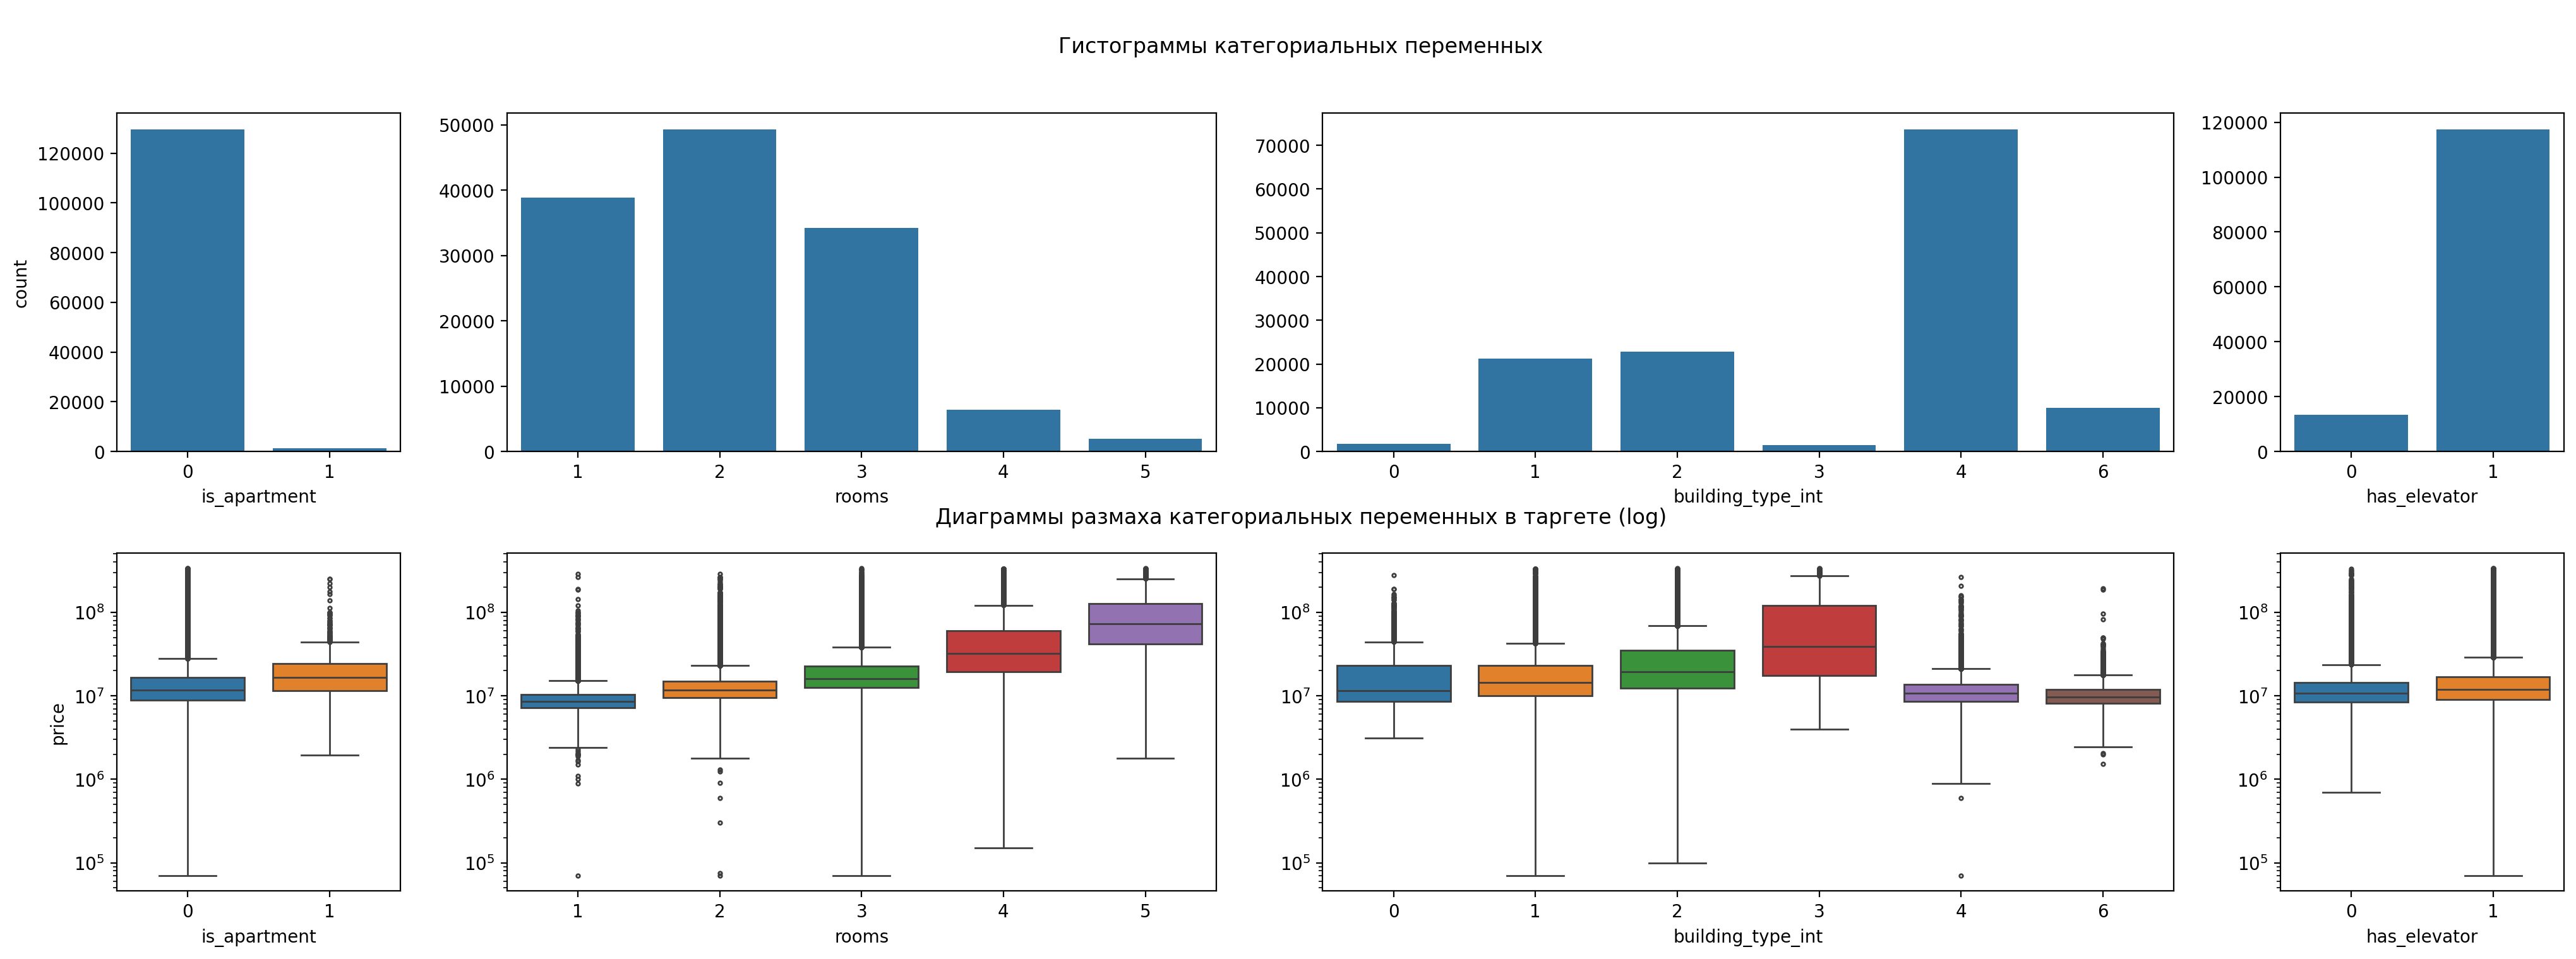

In [8]:
cat_value_counts = [df[col].nunique() for col in cat_columns]

fig, axs = plt.subplots(2, 4, figsize=(25, 8), gridspec_kw={'width_ratios': cat_value_counts})

for i, cat in enumerate(cat_columns):
    sns.countplot(data=df, x=cat, ax=axs[0][i])
    if i!=0:
        axs[0][i].set(ylabel='')


for i, cat in enumerate(cat_columns):
    sns.boxplot(y='price', x=cat, hue=cat, data=df, ax=axs[1][i], fliersize=2.0, legend=False, palette='tab10')
    axs[1][i].set_yscale("log")
    if i!=0:
        axs[1][i].set(ylabel='')


plt.subplots_adjust(hspace = 0.3)
plt.figtext(0.5, 0.49, "Диаграммы размаха категориальных переменных в таргете (log)", ha="center", va="top", fontsize=12) 
fig.suptitle('\nГистограммы категориальных переменных');

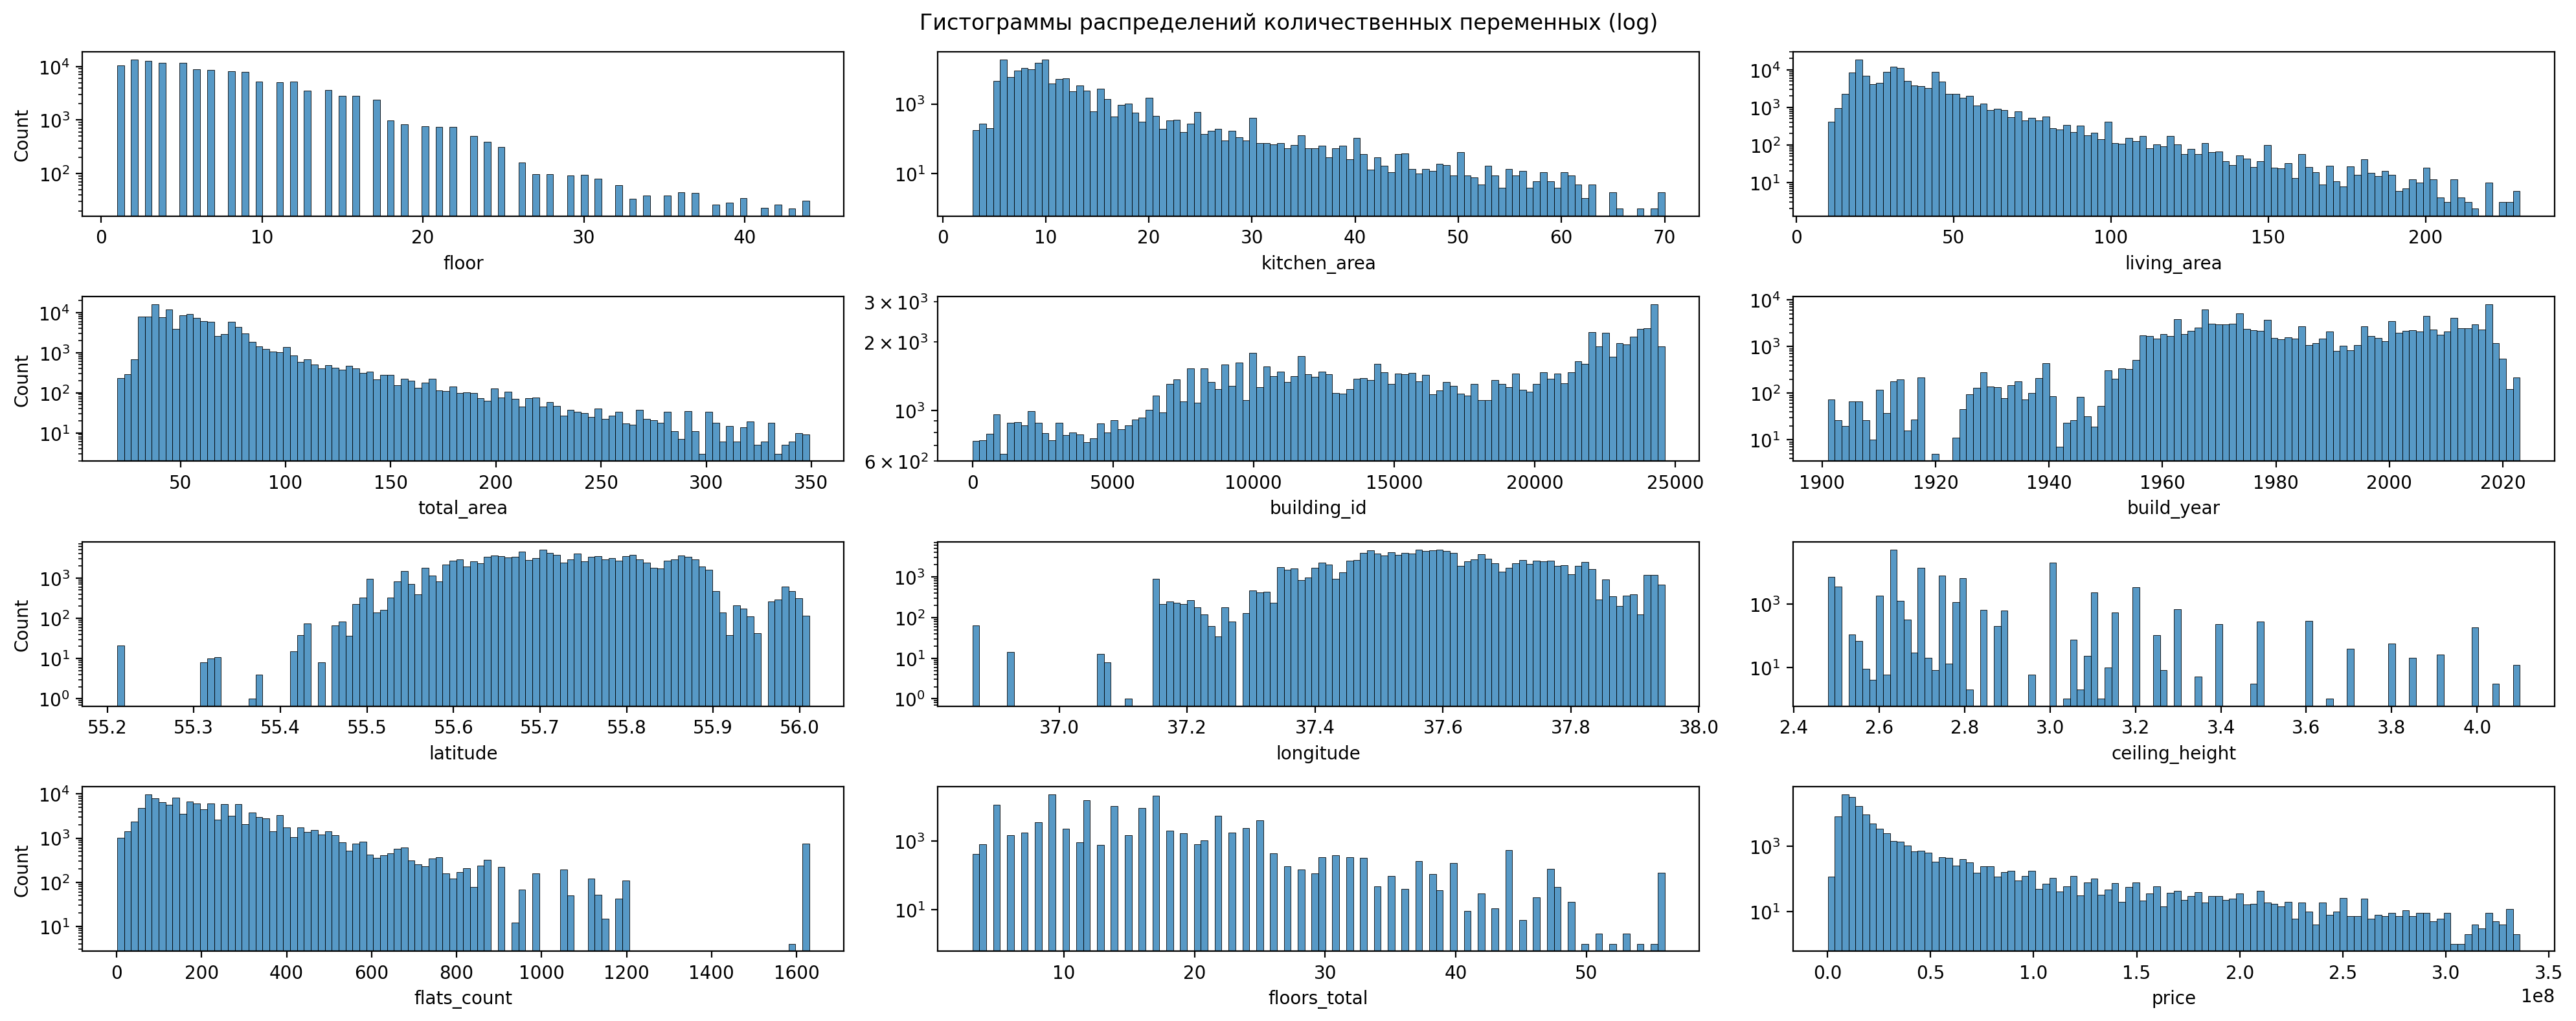

In [9]:
fig, axs = plt.subplots(4, 3)

for col, (x,y) in zip(num_columns+target, [(x, y) for x in range(4) for y in range(3)]):
    sns.histplot(data=df, x=col, bins=100, ax=axs[x,y])
    axs[x,y].set_yscale('log')
    if y!=0:
        axs[x,y].set(ylabel='')

fig.suptitle(f'Гистограммы распределений количественных переменных (log)')
plt.tight_layout()

In [32]:
tdf = pd.DataFrame(columns=['skew'])
for col in num_columns+target:
    tdf.loc[col] = skew(df[col])

tdf.sort_values(by='skew', ascending=False).T

,price,kitchen_area,total_area,living_area,flats_count,ceiling_height,floor,floors_total,latitude,longitude,building_id,build_year
skew,6.37,3.42,3.00,2.83,2.67,1.56,1.46,1.36,-0.00,-0.12,-0.20,-0.36


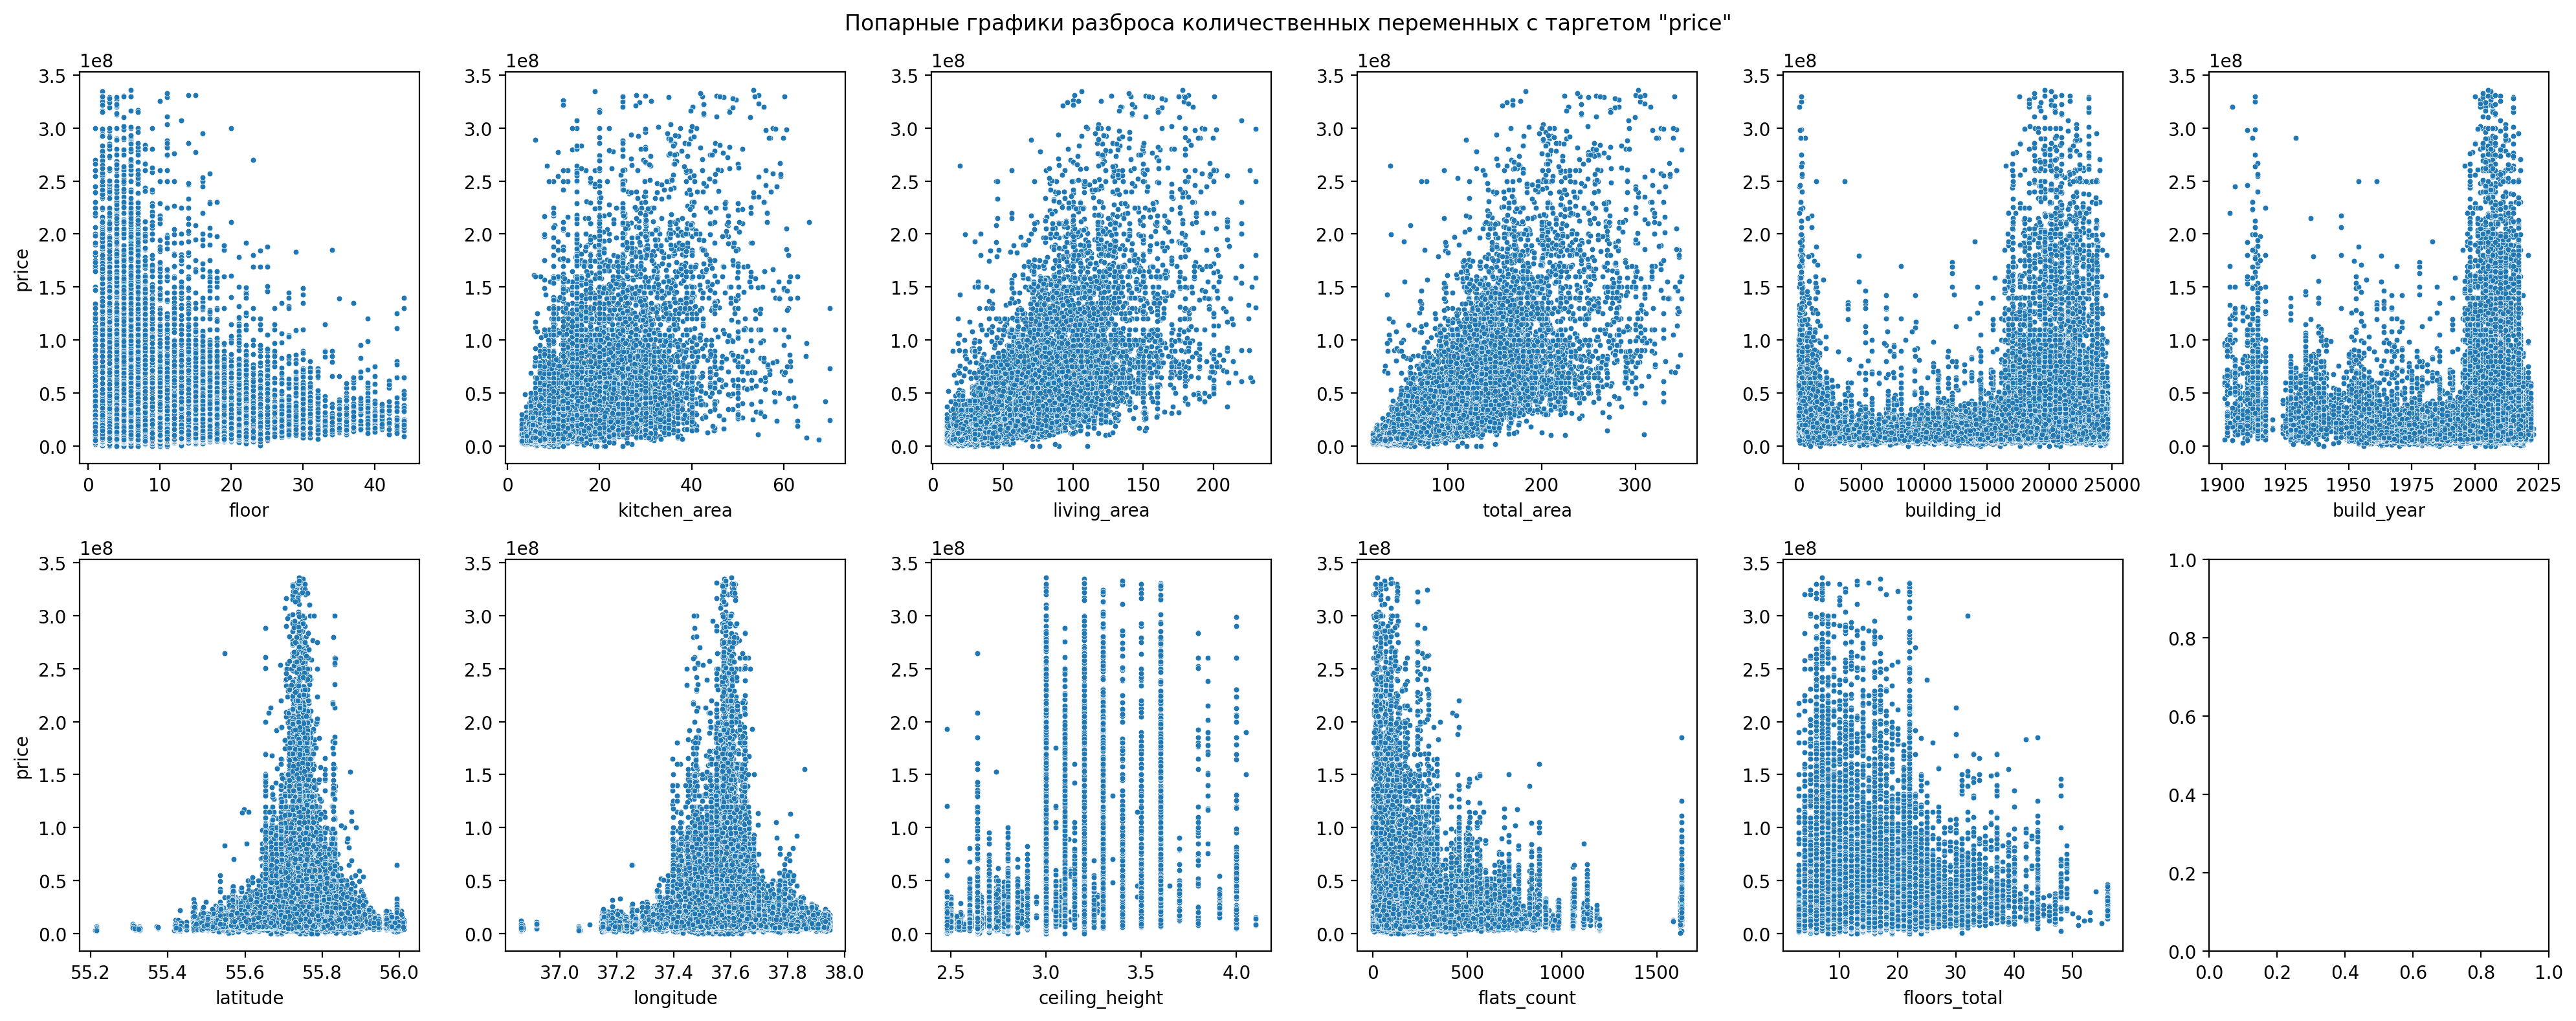

In [60]:
fig, axs = plt.subplots(2, 6)

for col, (x,y) in zip(num_columns, [(x, y) for x in range(2) for y in range(6)]):
    sns.scatterplot(data=df, x=col, y=target[0], ax=axs[x,y], s=10)
    if y!=0:
        axs[x,y].set(ylabel='')

fig.suptitle(f'Попарные графики разброса количественных переменных с таргетом "price"')
plt.tight_layout()

In [78]:
df[num_columns].corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.00
total_area,0.77
living_area,0.73
kitchen_area,0.62
ceiling_height,0.52
building_id,0.13
build_year,0.11
floors_total,0.09
floor,0.07
latitude,0.03


<Axes: >

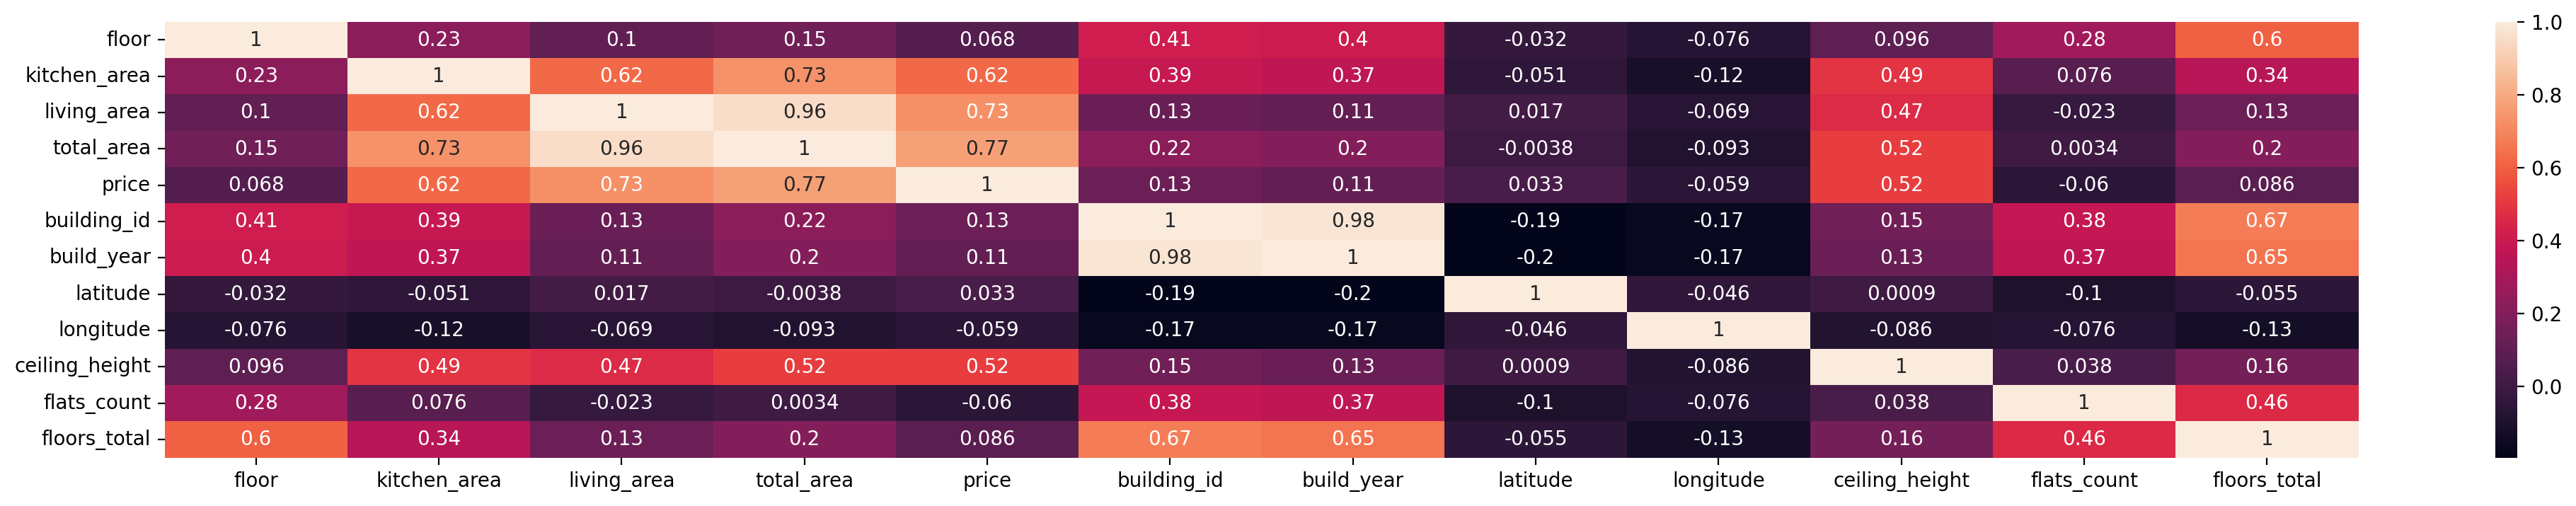

In [101]:
fig, ax = plt.subplots(figsize=(25, 4))
sns.heatmap(df[num_columns].corr(), annot=True)

In [88]:
df.phik_matrix(interval_cols=num_columns)[['price']].sort_values(by='price', ascending=False).T

,price,total_area,living_area,kitchen_area,rooms,ceiling_height,building_type_int,build_year,building_id,latitude,floors_total,longitude,floor,flats_count,is_apartment,has_elevator
price,1.00,0.74,0.71,0.61,0.60,0.57,0.38,0.36,0.32,0.28,0.27,0.22,0.14,0.11,0.02,0.02


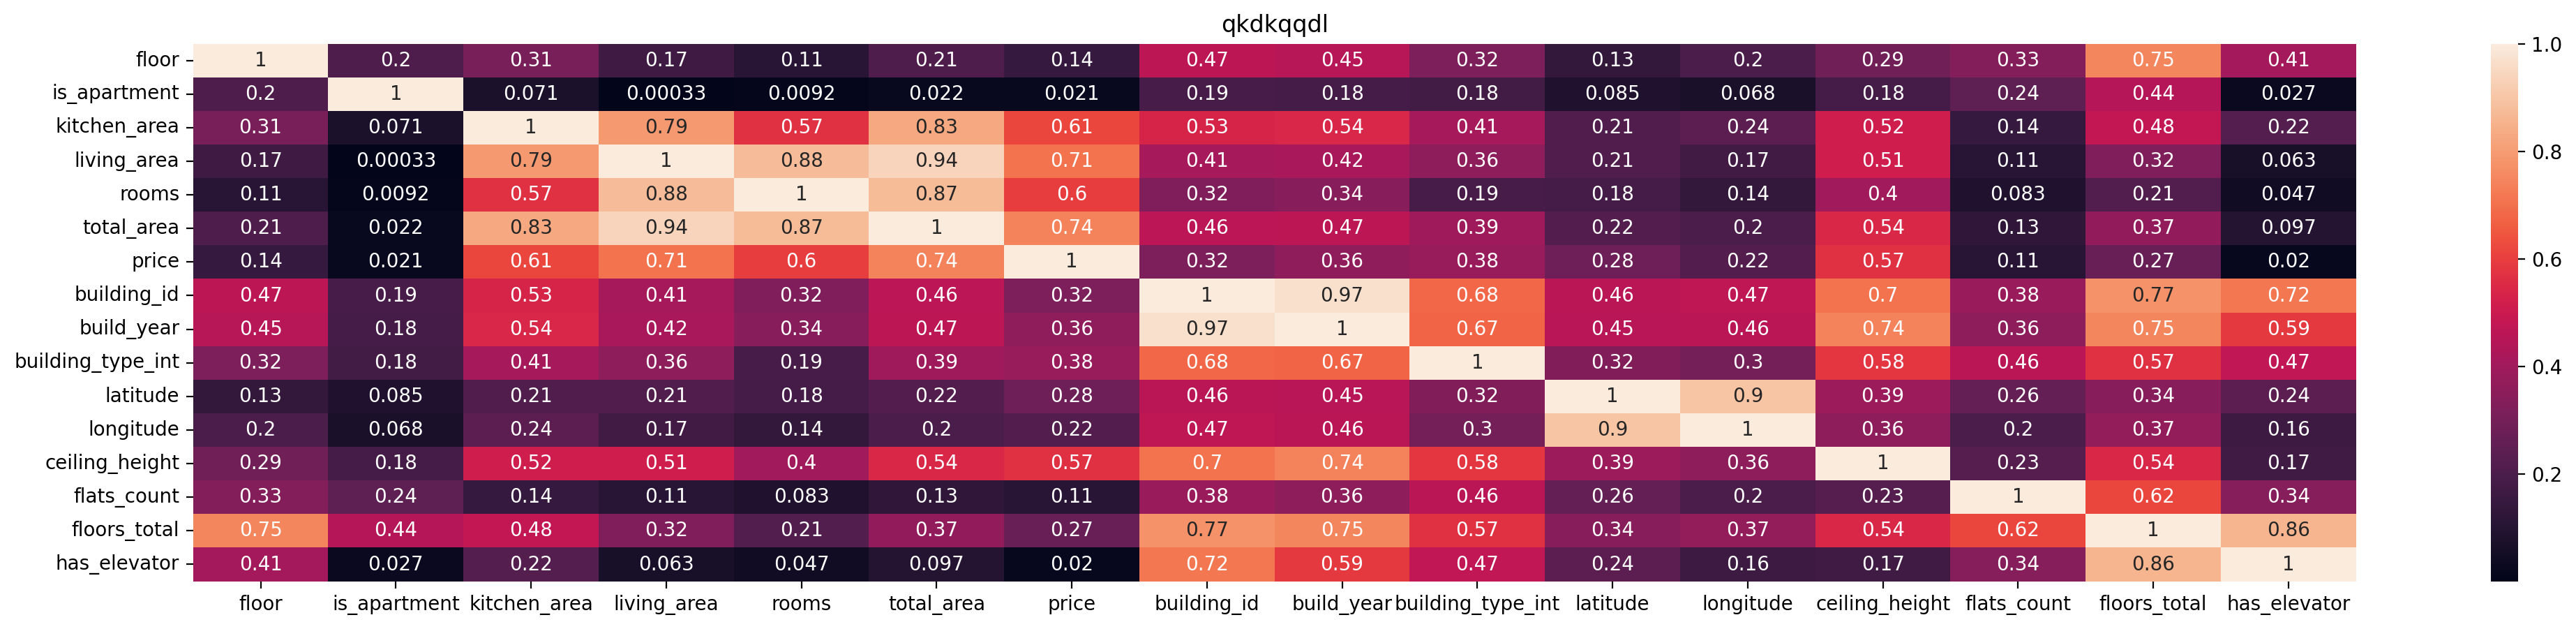

<Axes: >

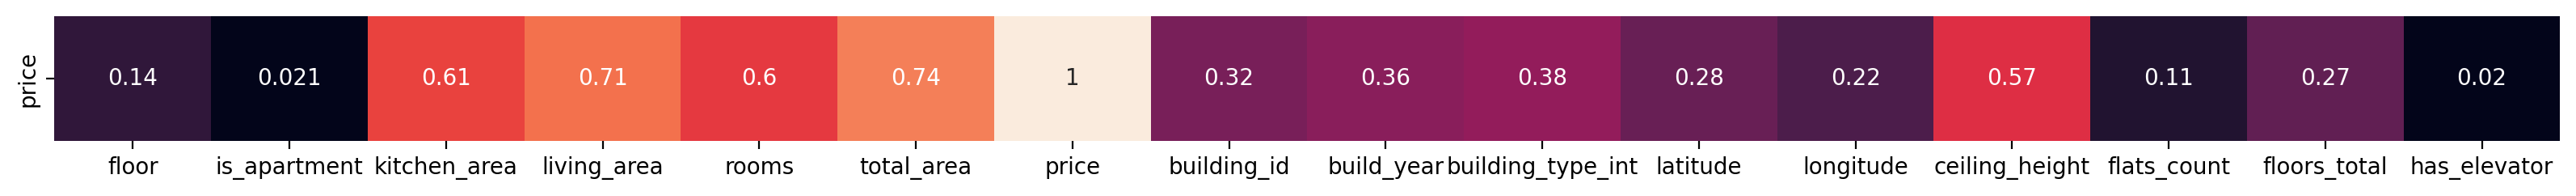

In [100]:
plt.figure(figsize = (25, 5))
plt.title('qkdkqqdl')
sns.heatmap(df.phik_matrix(interval_cols=num_columns), annot=True)
plt.show()

plt.figure(figsize = (20, 1))
sns.heatmap(df.phik_matrix(interval_cols=num_columns)[['price']].T, annot=True, cbar=False)